In [1]:
# !ls -hl|grep csv
import pandas as pd
import numpy as np
import os
from time import time, ctime

from sklearn.metrics import accuracy_score, classification_report, classification, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, StratifiedShuffleSplit

dim=lambda *x: [i.shape for i in x]

In [1]:
import os
import tensorflow as tf
from tensorflow.python.client import device_lib

from keras import backend as K

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

K.set_session(sess)

# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

print(device_lib.list_local_devices())

Using TensorFlow backend.


[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6777556318558177553
]


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator



import os



# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

Using TensorFlow backend.


CPU times: user 907 ms, sys: 245 ms, total: 1.15 s
Wall time: 10.5 s


In [5]:
df = pd.read_csv('./preprocessed.csv')
print df.shape

(49260, 748)
CPU times: user 3.33 s, sys: 240 ms, total: 3.57 s
Wall time: 3.58 s


In [6]:
pd.options.display.max_columns=100
print df.head(3)

,username,fname.gender,username_split_predict,last,last_two,first,first2,nchar,vowels.pct,digits.pct,last_is_vowel,first_is_vowel,last_is_digit,first_is_digit,digits.num,upper.pct,first_is_upper,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,...,feature_681,feature_682,feature_683,feature_684,feature_685,feature_686,feature_687,feature_688,feature_689,feature_690,feature_691,feature_692,feature_693,feature_694,feature_695,feature_696,feature_697,feature_698,feature_699,feature_700,feature_701,feature_702,feature_703,feature_704,feature_705,feature_706,feature_707,feature_708,feature_709,feature_710,feature_711,feature_712,feature_713,feature_714,feature_715,feature_716,feature_717,feature_718,feature_719,feature_720,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730
0,billion,male,unknow,n,on,b,bi,7,0.428571,0.0,False,False,False,False,0,0,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,14.0,7.0
1,ArmenSoft,male,male,t,ft,A,Ar,9,0.222222,0.0,False,False,False,False,0,2,True,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,9.0
2,okbookman,male,female,n,an,o,ok,9,0.444444,0.0,False,True,False,False,0,0,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,9.0


In [7]:
X = df.iloc[:,2:].values
print X.shape
y = df.iloc[:,1].map({'male':1,'female':0}).values
print y.shape

(49260, 746)
(49260,)


In [8]:

# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for i in range(5):
    i=str(i)
    exec("labelencoder_X_{} = LabelEncoder()".format(i))
    exec("X[:, {}] = labelencoder_X_{}.fit_transform(X[:, {}])".format(i,i,i))

XX=X.copy()

CPU times: user 643 ms, sys: 48 ms, total: 691 ms
Wall time: 690 ms


In [9]:
X=XX.copy()
print X.shape
onehotencoder = OneHotEncoder(categorical_features = range(5))
X = onehotencoder.fit_transform(X).toarray()
print X.shape

(49260, 746)
(49260, 4492)
CPU times: user 2.56 s, sys: 532 ms, total: 3.09 s
Wall time: 3.08 s


In [10]:
# remove one dummy variable to avoid dummy variable trap
print X.shape
X = X[:, 1:]
print X.shape

(49260, 4492)
(49260, 4491)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=7)
dim(X_train, X_test, y_train, y_test)

[(34482, 4491), (14778, 4491), (34482,), (14778,)]

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# fit on training set
X_train = sc.fit_transform(X_train)
# only transform on test set
X_test = sc.transform(X_test)
print dim(X_train,X_test, y_train, y_test)

[(34482, 4491), (14778, 4491), (34482,), (14778,)]
CPU times: user 2.5 s, sys: 1.29 s, total: 3.78 s
Wall time: 3.78 s


In [13]:
classifier = Sequential()
# first hidden layer
classifier.add(Dense(units = 256, 
                     input_dim=4491,
                     kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.5))
# second hidden layer
classifier.add(Dense(units = 128,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.4))
# second hidden layer
classifier.add(Dense(units = 64,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.3))
# thrid hidden layer
classifier.add(Dense(units = 48,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.2))
# thrid hidden layer
classifier.add(Dense(units = 32,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.1))
# thrid hidden layer
classifier.add(Dense(units = 24,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.1))
# thrid hidden layer
classifier.add(Dense(units = 256,  kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate= 0.5))
# # ouput layer
classifier.add(Dense(units = 1,  kernel_initializer='uniform', activation='sigmoid'))
# compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               1149952   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 48)                3120      
__________

In [14]:
from keras.callbacks import Callback, EarlyStopping
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=1)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

In [15]:
stopping = EarlyStopping(monitor='acc', min_delta=0,
                              patience=6, verbose=1, mode='auto')

In [16]:
# fitting ANN with training set
classifier.fit(X_train, y_train, 
               batch_size=256, epochs=16,
               validation_data=(X_test, y_test),
          callbacks=[TestCallback((X_test, y_test))])
#           callbacks=[stopping])
    


Train on 34482 samples, validate on 14778 samples
Epoch 1/16
14720/14778 [============================>.] - ETA: 0s
Testing loss: 0.460867927287, acc: 0.81979970222

34482/34482 [==============================] - 6s - loss: 0.5026 - acc: 0.8165 - val_loss: 0.4609 - val_acc: 0.8198
Epoch 2/16
14080/14778 [===========================>..] - ETA: 0s
Testing loss: 0.474614388352, acc: 0.81979970222

34482/34482 [==============================] - 6s - loss: 0.4400 - acc: 0.8200 - val_loss: 0.4746 - val_acc: 0.8198
Epoch 3/16
14112/14778 [===========================>..] - ETA: 0s
Testing loss: 0.506805902135, acc: 0.81979970222

34482/34482 [==============================] - 6s - loss: 0.4154 - acc: 0.8200 - val_loss: 0.5068 - val_acc: 0.8198
Epoch 4/16
14208/14778 [===========================>..] - ETA: 0s
Testing loss: 0.488993572574, acc: 0.81337122746

34482/34482 [==============================] - 6s - loss: 0.3945 - acc: 0.8243 - val_loss: 0.4890 - val_acc: 0.8134
Epoch 5/16
14688/14778

KeyboardInterrupt: 

0.799972932738
Confusion matrix, without normalization
[[  529  2134]
 [  822 11293]]


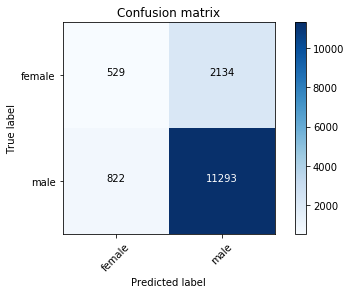

CPU times: user 5.25 s, sys: 637 ms, total: 5.89 s
Wall time: 2.97 s


In [53]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred> 0.5)

print accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print cm